In [32]:
import sys
from datetime import datetime
import pandas as pd
import statsmodels.api as sm
import numpy as np

# graphics lib
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')
from pprint import pprint

#datetime
from datetime import datetime


# sklearn
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
sys.version

'3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  2 2016, 17:53:06) \n[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]'

In [3]:
pd.set_option('display.max_columns',999)

In [4]:
! head -2 chicago_crime.csv

ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,false,false,0412,004,8,45,11,,,2001,08/05/2017 03:50:08 PM,,,


In [5]:
! tail -1 chicago_crime.csv

24559,JC278908,05/26/2019 02:11:00 AM,013XX W HASTINGS ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,false,false,1233,012,25,28,01A,1167746,1893853,2019,06/20/2020 03:48:45 PM,41.864278357,-87.659682244,"(41.864278357, -87.659682244)"


In [ ]:

col_dtypes ={
        'ID':int,
        'Case Number':str,
        'Date':str,
        'Block':str,
        'IUCR':str,
        'Primary Type':str,
        'Description':str,
        'Location Description':str,
        'Arrest':bool,
        'Domestic':bool,
        'Beat':float,
        'District':float,
        'Ward':float,
        'Community Area':float,
        'FBI Code':str,
        'X Coordinate':float,
        'Y Coordinate':float,
        'Year':int,
        'updated on':str,
        'Latitude':float,
        'Longitude':float,
        'Location':str
    }

raw_data = pd.read_csv('chicago_crime.csv',dtype=col_dtypes)


In [ ]:

raw_data.columns = raw_data.columns.str.strip().str.lower().str.replace(' ', '_')
raw_data.to_feather('raw_data')
homicide_data=raw_data.loc[raw_data['primary_type']=='HOMICIDE']
homicide_data.reset_index().to_feather('homicide_data')


In [2]:
 homicide_data = pd.read_feather('homicide_data')

In [3]:
homicide_data.dtypes

index                     int64
id                        int64
case_number              object
date                     object
block                    object
iucr                     object
primary_type             object
description              object
location_description     object
arrest                     bool
domestic                   bool
beat                    float64
district                float64
ward                    float64
community_area          float64
fbi_code                 object
x_coordinate            float64
y_coordinate            float64
year                      int64
updated_on               object
latitude                float64
longitude               float64
location                 object
dtype: object

In [4]:
homicide_data.head(3)

,index,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,28536,2174,HJ374672,05/20/2003 03:15:00 AM,015XX N LASALLE ST,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,...,NaN,NaN,01A,NaN,NaN,2003,05/03/2018 03:49:53 PM,NaN,NaN,None
1,36751,983,G446123,07/29/2001 10:15:00 AM,011XX N LASALLE ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,...,NaN,NaN,01A,NaN,NaN,2001,05/03/2018 03:49:53 PM,NaN,NaN,None
2,60754,24378,JC113580,01/11/2019 10:30:00 PM,000XX E IDA B WELLS DR,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,4.0,32.0,01A,NaN,NaN,2019,03/09/2019 03:58:58 PM,NaN,NaN,None


In [5]:
int_cols = ['beat','district','ward','community_area','year']

In [6]:
homicide_data[int_cols] = homicide_data[int_cols].apply(lambda x: x.fillna(-999).astype(int))

In [7]:
homicide_data.head(3)

,index,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,28536,2174,HJ374672,05/20/2003 03:15:00 AM,015XX N LASALLE ST,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,...,-999,-999,01A,NaN,NaN,2003,05/03/2018 03:49:53 PM,NaN,NaN,None
1,36751,983,G446123,07/29/2001 10:15:00 AM,011XX N LASALLE ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,...,-999,-999,01A,NaN,NaN,2001,05/03/2018 03:49:53 PM,NaN,NaN,None
2,60754,24378,JC113580,01/11/2019 10:30:00 PM,000XX E IDA B WELLS DR,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,4,32,01A,NaN,NaN,2019,03/09/2019 03:58:58 PM,NaN,NaN,None


[read the formatting](https://www.tutorialspoint.com/python/time_strptime.htm)

In [8]:
# date columns
date_cols = ['date','updated_on']
homicide_data[date_cols] = homicide_data[date_cols].apply(lambda x:pd.to_datetime(x, format="%m/%d/%Y %I:%M:%S %p"))


In [9]:
homicide_data.dtypes[['date','updated_on']]

date          datetime64[ns]
updated_on    datetime64[ns]
dtype: object

Number of Murders by Year

In [10]:
homicide_data.index = pd.DatetimeIndex(homicide_data['date'])

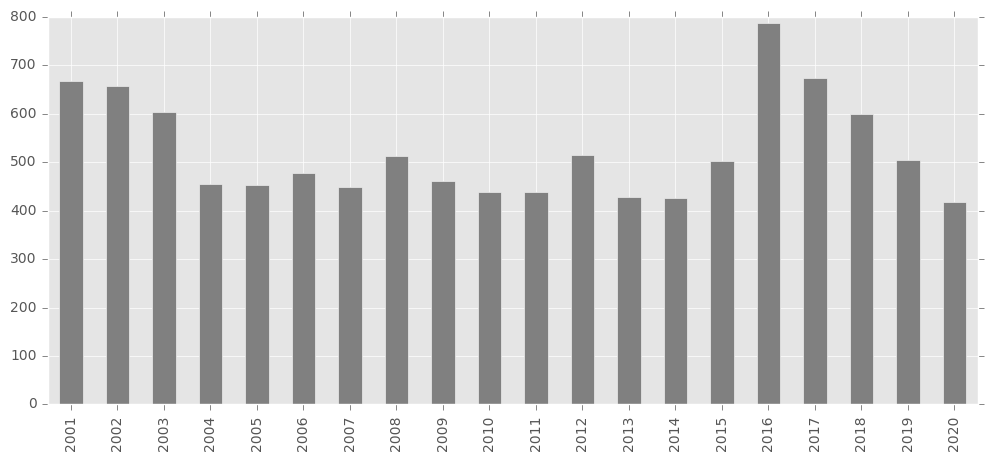

In [11]:
plt.figure(figsize=(12,5))
homicide_data['year'].value_counts().sort_index().plot(kind = 'bar',color=['gray'])


In [12]:
homicide_data['year_month'] = homicide_data['date'].apply(lambda x:datetime.strftime(x,'%Y%m'))

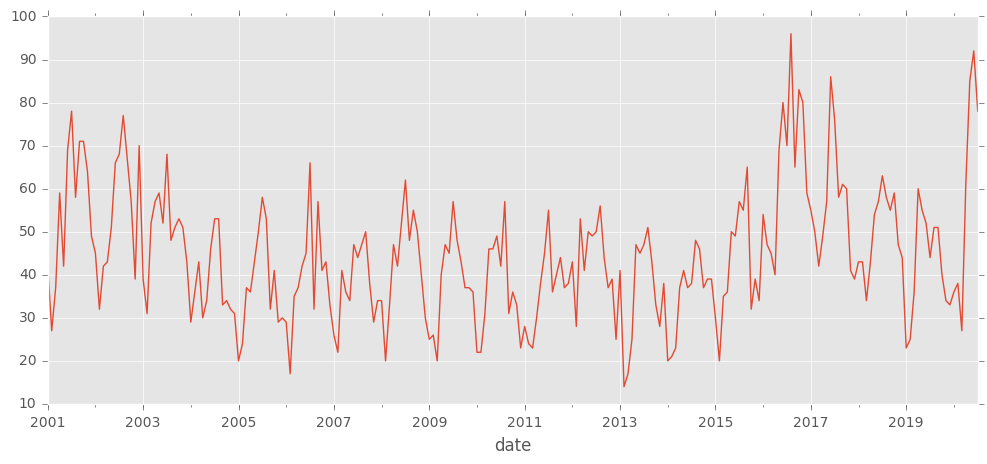

In [13]:
plt.figure(figsize=(12,5))
homicide_data.resample('M').size().plot()

In [14]:
homicide_data['month'] = homicide_data['date'].apply(lambda x:x.month)

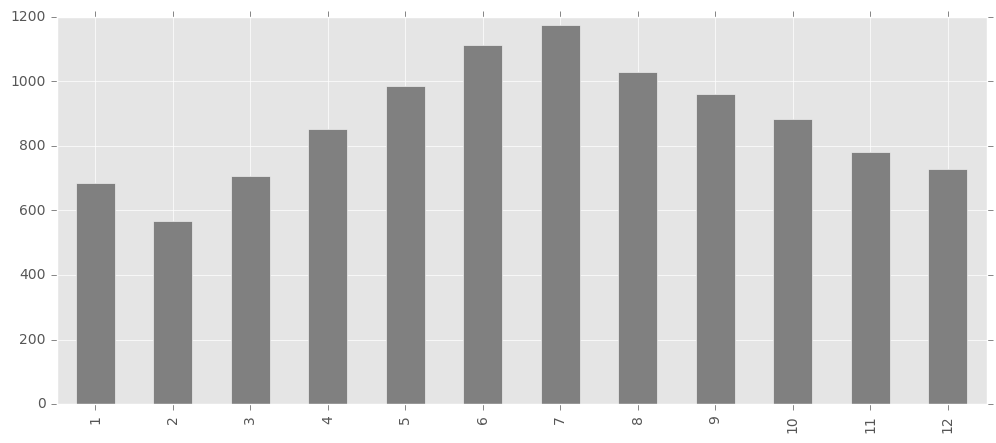

In [15]:
plt.figure(figsize=(12,5))
homicide_data['month'].value_counts().sort_index().plot(kind='bar',color='gray')

In [16]:
arrest_stats = ( homicide_data.groupby(['year','arrest']).agg('count')[['index']]
    .reset_index()
    .pivot(index="year",columns="arrest",values="index"))


arrest_stats['pct_arrest_cases'] = (100*arrest_stats[True]/(arrest_stats[True]+arrest_stats[False])).astype('int')

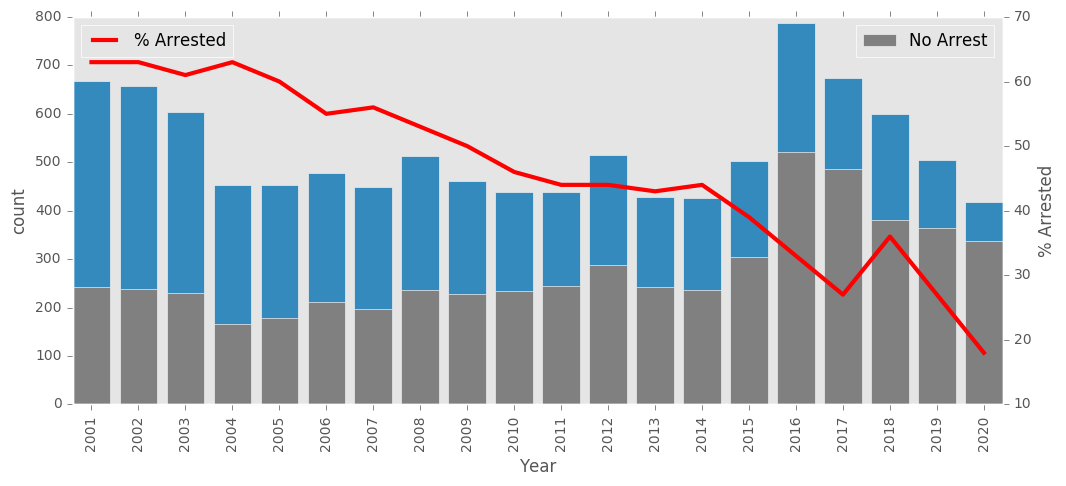

In [17]:
fig, ax1 = plt.subplots(figsize=(12,5))
ax1.set_xlabel("Year")
ax1.set_ylabel("count")

ax1.bar(left = arrest_stats.index.values,height=arrest_stats[True]+arrest_stats[False],align='center')
ax1.bar(left = arrest_stats.index.values,height=arrest_stats[False],label="No Arrest",color='gray',align='center')
ax1.legend(loc=1)
ax1.grid(False)
plt.xticks(np.arange(min(homicide_data.year),max(homicide_data.year)+1,step=1),rotation='vertical')

ax2 = ax1.twinx()

color = 'red'
ax2.set_ylabel("% Arrested")
ax2.plot(arrest_stats.index.values,arrest_stats['pct_arrest_cases'],color=color,label="% Arrested",linewidth=3)
ax2.legend(loc=2)
ax2.grid(False)

In [20]:
arrest_stats

arrest,False,True,pct_arrest_cases
year,,,
2001,242,425,63
2002,239,418,63
2003,231,373,61
2004,166,288,63
2005,179,274,60
2006,212,265,55
2007,197,251,56
2008,236,277,53
2009,229,232,50


In [33]:
regr = LinearRegression()

In [34]:
regr_fit = regr.fit(arrest_stats.reset_index()[['year']],arrest_stats['pct_arrest_cases'])

In [35]:
regr_fit.score(homicide_data[['year']], homicide_data['arrest'])

-9129.7036365693057

In [36]:
regr_fit.coef_

array([-2.18421053])

In [31]:
type(arrest_stats.reset_index()[['year']])

pandas.core.frame.DataFrame

In [ ]:
clfr = RandomForestClassifier()

In [ ]:
pprint(clfr.get_params())

In [ ]:
test_idx = np.random.choice(homicide_data.shape[0],replace=False,size=int(homicide_data.shape[0]*.2))
h_test = homicide_data.iloc[test_idx]

homicide_data=homicide_data.loc(~h_test)


In [ ]:
homicide_data.shape